In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy.io import arff

from myTrain import trainClassifiers

def getData(dataPath):
    fileName = "{}/{}.music.arff"
    dataset = None
    for i in range(1,15):
        with open(fileName.format(dataPath,i), 'r') as f:
            # https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html
            ## Read arff
            data, meta = arff.loadarff(f)
            ## Convert to a dataframe
            print(fileName.format(dataPath,i))
            # dataset = dataset[features]
            if i == 1:
                dataset = pd.DataFrame(data)
            else:
                dataset = pd.concat([dataset, pd.DataFrame(data)], ignore_index=True)

    d = dataset
    d.iloc[:,-1] = [1 if str(w, 'utf-8')=='music' else 0 for w in d.iloc[:,-1]]
    print("Calculating correlation")
    corr = d.corr()
    print("Calculated correlation")
    
    # Split into data and labels
    #X = dataset.iloc[:, :-1].values
    #y = np.array([1 if str(w, 'utf-8') == 'music' else 0 for w in dataset.iloc[:, -1]])
    return dataset, corr

dataPath = r'../data/train_arff'
print("Start Program")
dataset, corr = getData(dataPath)
classes = corr["class"][:-1]
dataset.head()

Start Program
../data/train_arff/1.music.arff
../data/train_arff/2.music.arff
../data/train_arff/3.music.arff
../data/train_arff/4.music.arff
../data/train_arff/5.music.arff
../data/train_arff/6.music.arff
../data/train_arff/7.music.arff
../data/train_arff/8.music.arff
../data/train_arff/9.music.arff
../data/train_arff/10.music.arff
../data/train_arff/11.music.arff
../data/train_arff/12.music.arff
../data/train_arff/13.music.arff
../data/train_arff/14.music.arff
Calculating correlation
Calculated correlation


,f000001,f000002,f000003,f000004,f000005,f000006,f000007,f000008,f000009,f000010,...,f000697,f000698,f000699,f000700,f000701,f000702,f000703,f000704,f000705,class
0,0.45,0.34,0.33,0.35,0.4,0.31,0.3,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,0
1,0.45,0.34,0.33,0.35,0.4,0.31,0.3,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,0
2,0.45,0.34,0.33,0.35,0.4,0.31,0.3,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,0
3,0.45,0.34,0.33,0.35,0.4,0.31,0.3,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,0
4,0.45,0.34,0.33,0.35,0.4,0.31,0.3,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,0


In [2]:
features = classes[classes.abs() > 0.2].index.tolist()
X = dataset[features].values
y = np.array(dataset.iloc[:, -1])

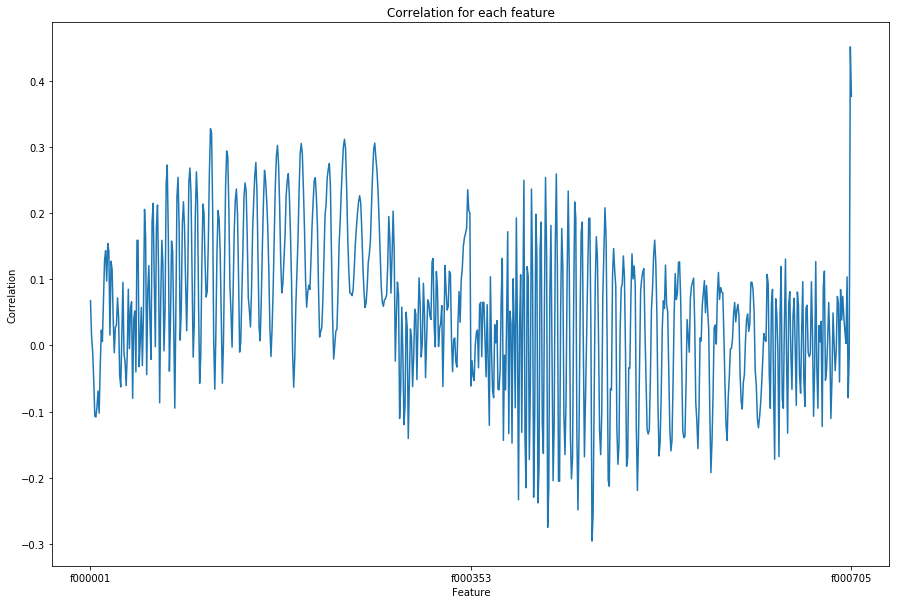

In [3]:
i = classes.count() - 1
i2 = int(i/2)
plt.figure(figsize=(15, 10))
plt.title("Correlation for each feature")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.xticks([0, classes.count()/2, classes.count() - 1], [classes.index[0],classes.index[i2],classes.index[i]])
plt.plot(classes)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1500, test_size=1500, random_state=0)

Model Baseline mean accuracy: 0.7917631775263374
Model Naive Bayes mean accuracy: 0.7917631775263374
Model KNN mean accuracy: 0.8716043784723494


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Model Logistic Regression mean accuracy: 0.9078142841363247
[LibSVM]

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Model SVM mean accuracy: 0.7930407250677691
Model DecisionTree mean accuracy: 0.8735194557490928
Model RandomForest mean accuracy: 0.9258278752337515


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Model NN mean accuracy: 0.9081321551931298


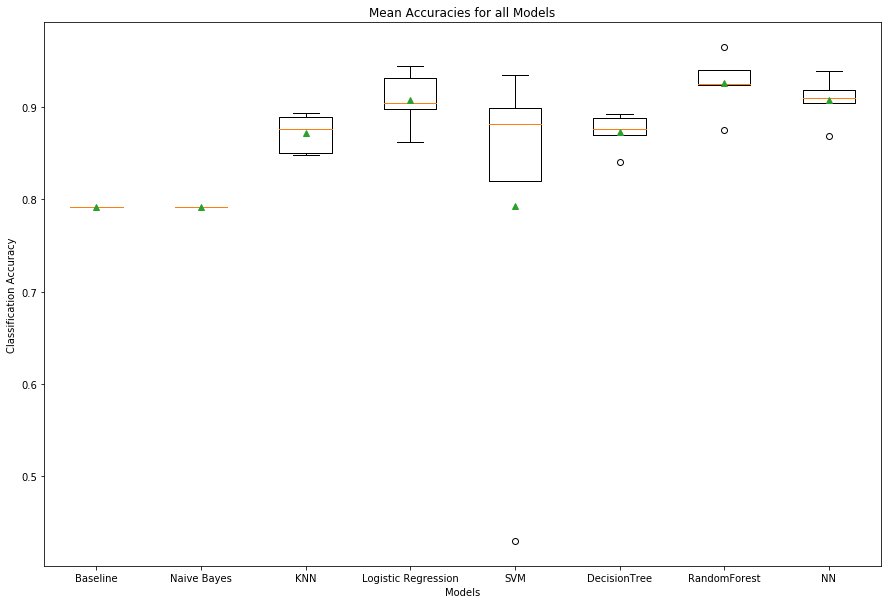

In [6]:
results = trainClassifiers(X, y)

plt.figure(figsize=(15, 10))
plt.title("Mean Accuracies for all Models")
plt.ylabel("Classification Accuracy")
plt.xlabel("Models")
plt.boxplot(results.values(), showmeans=True, notch=False)
plt.xticks(range(1, len(results.keys()) + 1), results.keys(), rotation='horizontal')
plt.show()

In [18]:
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def getModelTypes():
    return ['Baseline','Naive Bayes','KNN','Logistic Regression', 'SVM','DecisionTree', 'RandomForest', 'NN']

def performGridSearch(train, train_labels,estimator, param_grid):
    rs = GridSearchCV(estimator, param_grid)  # add code here

    # Fit
    rs.fit(train, train_labels)
    rs.best_params_
    best_model = rs.best_estimator_
    return best_model

def hyperParamClassifiers(X, y):
    RSEED = 0
    model_types = getModelTypes()
    folds = 5
    all_metrics = {}
    paramDict = dict()

    for model in model_types:
        #Choose Model
        if model == 'Naive':
            classifier = GaussianNB()
            paramDict = [{'var_smoothing': [1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]}]
        elif model == 'Baseline':
            classifier = DummyClassifier(strategy = "most_frequent",random_state=RSEED)
        elif model == 'Logistic Regression':
            classifier = linear_model.LogisticRegression()
            paramDict = [{'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}]
        elif model == 'KNN':
            classifier = KNeighborsClassifier()
            paramDict = [{'n_neighbors': [1,3,5,7,9], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"] }]
        elif model == 'SVM':
            classifier = SVC(max_iter= 100, kernel='linear',random_state=RSEED)
            paramDict = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
        elif model == 'DecisionTree':
            classifier = DecisionTreeClassifier(max_depth = 1000, random_state=RSEED)
            paramDict = [{'criterion': ["gini", "entropy"], "min_samples_split": [2,3,4,5,6,7,8,9], "min_samples_leaf": [1,2,3,4,5,6,7,8,9]}]
        elif model == 'RandomForest':
            classifier = RandomForestClassifier(max_depth = 1000, n_estimators=100,random_state=RSEED)
            paramDict = [{'criterion': ["gini", "entropy"], "min_samples_split": [2,3,4,5,6,7,8,9], "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
                          'n_estimators': [10,50,100]}]
        elif model == 'NN':
            classifier = MLPClassifier(random_state=RSEED)
            paramDict = [{'hidden_layer_sizes': [10, 50, 100]}]

        #Perform Cross Validation for the current model
        all_metrics[model] = performGridSearch(X,y,classifier,paramDict)
        print(model)

    return all_metrics

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Baseline
Naive Bayes


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNN


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Logistic Regression
SVM


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForest


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NN


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
classifiers = hyperParamClassifiers(X_train, y_train)

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Baseline
Naive Bayes
KNN


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was

Logistic Regression


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packa

SVM
DecisionTree


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForest


C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

NN


In [40]:
accuracies = []
for classifier in classifiers.values():
    print(classifier)
    y_valP = classifier.predict(X_train)
    y_testP = classifier.predict(X_test)
    valAcc = accuracy_score(y_train, y_valP)
    testAcc = accuracy_score(y_test, y_testP)
    accuracies.append([valAcc, testAcc])

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')
DummyClassifier(constant=None, random_state=0, strategy='most_frequent')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=100, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
  

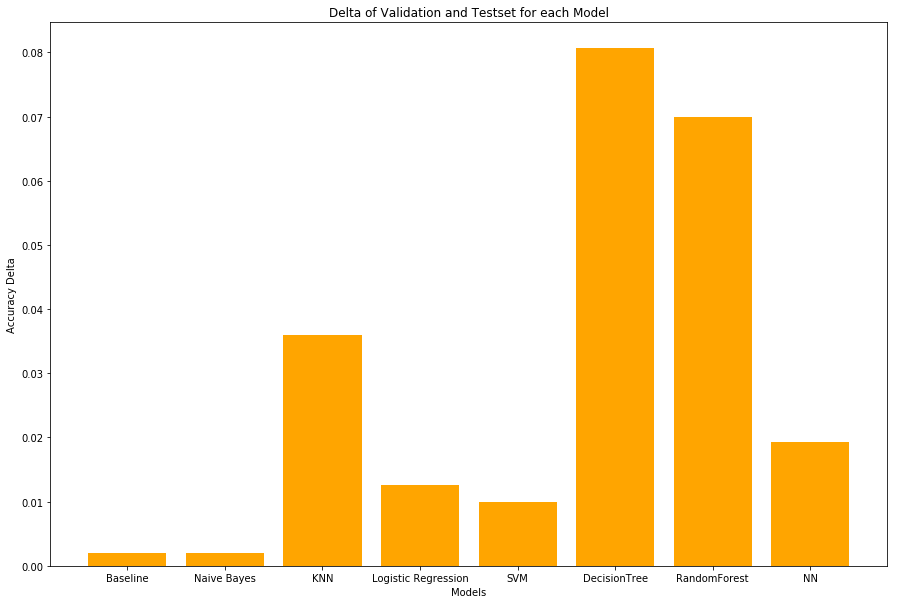

In [68]:
accuracies

plt.figure(figsize=(15, 10))
for i in range(len(accuracies)):
     plt.bar(i,accuracies[i][0] - accuracies[i][1], color= "orange")
    #plt.bar(i,accuracies[i][0], color= "orange",alpha=0.3)
    #plt.bar(i,accuracies[i][1], color= "black",alpha=0.3)

plt.ylabel('Accuracy Delta')
plt.xlabel("Models")
plt.title('Delta of Validation and Testset for each Model')
plt.xticks(range(0,len(classifiers.keys())),classifiers.keys())

plt.show()

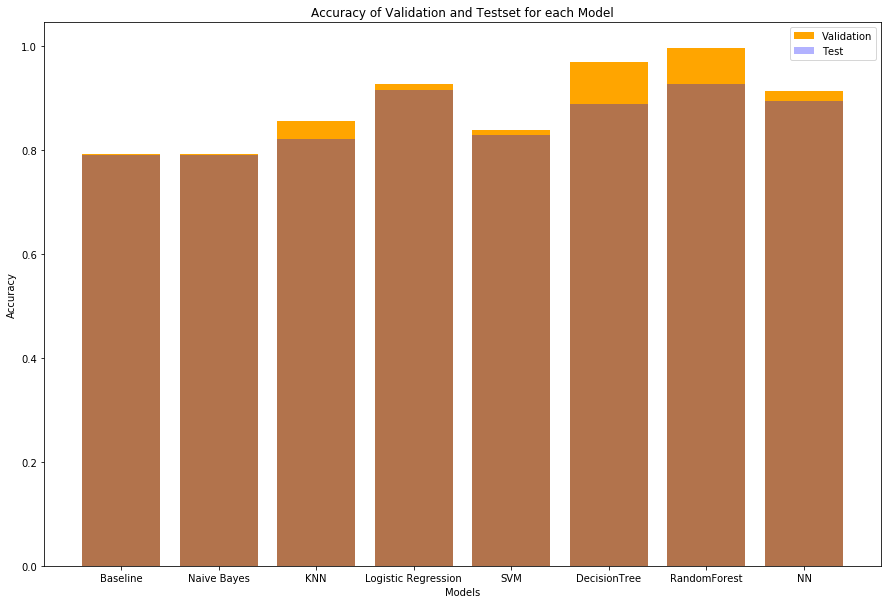

In [81]:
plt.figure(figsize=(15, 10))

p1, p2 = None,None
for i in range(len(accuracies)): 
    p1 = plt.bar(i,accuracies[i][0], color= "orange", label = "Validation")
    p2 = plt.bar(i,accuracies[i][1], color= "blue", label="Test", alpha = 0.3)

plt.ylabel('Accuracy')
plt.xlabel("Models")
plt.title('Accuracy of Validation and Testset for each Model')
plt.legend((p1[0],p2[0]), ('Validation', 'Test'))
plt.xticks(range(0,len(classifiers.keys())),classifiers.keys())

plt.show()